<a href="https://colab.research.google.com/github/Bryce-Davidson/Machine_Learning/blob/master/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
%matplotlib inline


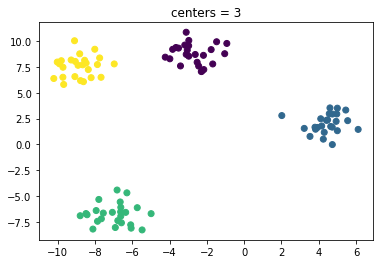

In [6]:
np.random.seed(42)
X, colors = make_blobs(n_features=2, centers=4)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=colors)
plt.title('centers = 3')
plt.show()

In [8]:
class K_Means:
  def __init__(self, k, tol=1e-4, max_iter=300):
    self.k = k
    self.tol = tol
    self.max_iter = max_iter
    self.centroids = None

  def __create_centroids_from_data(self):
    return X[np.random.choice(len(self.X), size=self.k, replace=False)]

  @staticmethod
  def __euclidean_distance(x, C):
    return np.sqrt(np.sum((x-C)**2, axis=1))
  
  def __get_distance_matrix(self):
    distances_matrix = np.empty((len(self.X), len(self.centroids)))
    for i, x in enumerate(self.X):
      distances_matrix[i] = self.__euclidean_distance(x, self.centroids)
    return distances_matrix
  
  def __create_clusters(self, dist_matrix):
    centroid_clusters = [[] for _ in range(len(self.centroids))]
    for i, distances_to_centroids in enumerate(dist_matrix):
      closest_centroid_idx = np.argmin(distances_to_centroids)
      centroid_clusters[closest_centroid_idx].append(i)
    return centroid_clusters
  
  def __update_centroids(self, cluster_idxs):
    old_centroids = self.centroids.copy()
    for i, sample_idxs in enumerate(cluster_idxs):
      self.centroids[i] = np.mean(self.X[sample_idxs], axis=0)
    return old_centroids
  
  def __is_converged(self, old_centroids):
    return (abs(np.subtract(self.centroids, old_centroids)) <= self.tol).all()

  def __plot(self, title):
    plt.figure()
    plt.scatter(self.X[:, 0], self.X[:, 1], c=colors)
    plt.plot(self.centroids[:,0], self.centroids[:, 1], "ro")
    plt.title(f'{title}')
    plt.show()

  def fit(self, X):
    self.X = X
    self.centroids = self.__create_centroids_from_data()
    self.__plot("Before")
    
    for i in range(self.max_iter):
      point_dists_to_centroids = self.__get_distance_matrix()
      cluster_idxs = self.__create_clusters(point_dists_to_centroids)
      old_centroids = self.__update_centroids(cluster_idxs)
      self.__plot(f"On Iteration: {i}")
      if self.__is_converged(old_centroids):
        break

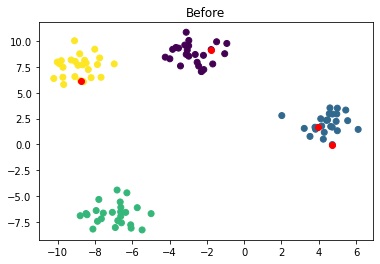

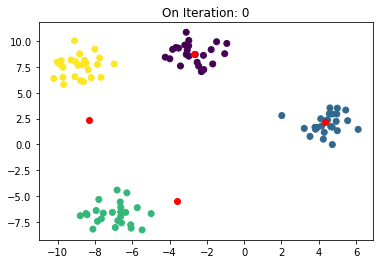

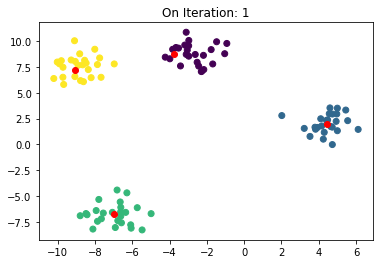

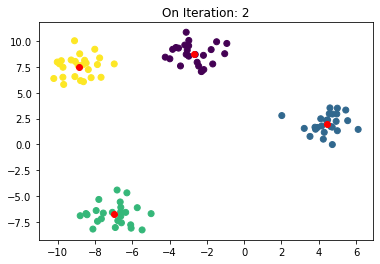

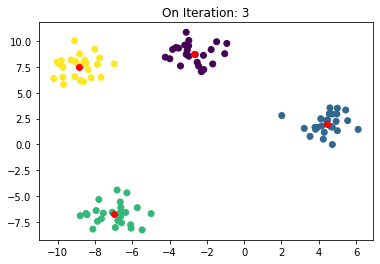

In [11]:
km = K_Means(4, max_iter=10)
km.fit(X)